# Plongeur et sous-marin

Dans ce projet, on cherche à estimer la profondeur de plongée en équilibre statique (sans mouvement) d'un sous-marin.

Un sous-marin navigue à la surface en maintenant vides des volumes appelés **ballasts**. 
Pour plonger, il s'alourdit en y admettant de l'eau de mer. 
Le retour en surface s'obtient en effectuant l'opération inverse.

Mais suivant la profondeur de plongée du sous-marin, la salinité ou bien la température, la densité de l'eau salée varie (un peu). On cherche ici à tenir compte de cette variation pour estimer le volume des ballasts.

Ce projet est divisé en trois parties thématiques
1. étude l'évolution de la densité de l'eau salée suivant la profondeur ;
2. étude d'un plongeur sans bouteille dans la couche de surface ;
3. calcul du volume des ballasts pour une plongée statique de sous-marin en eaux profondes.

Les parties *... Pour aller plus loin ...* sont optionnelles, et pas nécessaires pour toucher aux trois thèmes du sujet.


In [1]:
#pour ce projet, on importera les paquets suivants
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Première partie. Plongée sans bouteille

Dans cette partie, on cherche à identifier la profondeur d'équilibre à laquelle se place naturellement un plongeur lorsque'il ne produit aucun effort.

Le plongeur évolue dans de l'eau considérée comme un
liquide homogène et incompressible. 

Le champ de pesanteur est considéré comme uniforme : $\mathbf{g} = - g \mathbf{e_z}$ uniforme avec $g = 9,81 m.s^{-2}$ . 
On considère un axe $(Oz)$ suivant la verticale ascendante.

La
surface libre de l’eau (altitude $z = 0$) est en contact avec l’atmosphère, de pression constante $P_{atm} = 1,013 \cdot 10^5 Pa$ .

On considère différentes profondeurs de plongée sous l'eau, soit différentes altitudes $z<0$.

## 1. Distribution de la pression hydrostatique sur les 70 premiers mètres

On considère la densité de l'eau de mer uniforme sur les 70 premiers mètres, à la valeur de la couche superficielle identifiée dans la première partie du projet.

> 1. créer une variable scalaire rho_eau modélisant la masse volumique de l’eau.
> 1. créer un vecteur profondeur *z_vec* allant de -70 à 0 avec un pas de 1.
> 1. exprimer la pression hydrostatique en fonction de la profondeur. Calculer la pression hydrostatique  de l'eau $p(z)$, sous la forme d'un vecteur *p_vec* de même dimension.
> 1. tracer une figure représentant la pression $p$ en fonction de $z$. On placera l'axe des *z_vec* sur l'ordonnée.

In [2]:
# question 1. Scalaire masse volumique
rho_eau=1026 #en kg.m**-3

In [3]:
# question 2. Vecteur profondeur.
z_vec=np.arange(-70,0,1)

*question 3. Formulation >>> A COMPLETER*
    

In [4]:
# question 3. Pression hydrostatique
p_atm=1.013*10**5
g=9.81
p_vec=p_atm-(rho_eau*g*z_vec) #Pa
print(p_vec)

[805854.2  795789.14 785724.08 775659.02 765593.96 755528.9  745463.84
 735398.78 725333.72 715268.66 705203.6  695138.54 685073.48 675008.42
 664943.36 654878.3  644813.24 634748.18 624683.12 614618.06 604553.
 594487.94 584422.88 574357.82 564292.76 554227.7  544162.64 534097.58
 524032.52 513967.46 503902.4  493837.34 483772.28 473707.22 463642.16
 453577.1  443512.04 433446.98 423381.92 413316.86 403251.8  393186.74
 383121.68 373056.62 362991.56 352926.5  342861.44 332796.38 322731.32
 312666.26 302601.2  292536.14 282471.08 272406.02 262340.96 252275.9
 242210.84 232145.78 222080.72 212015.66 201950.6  191885.54 181820.48
 171755.42 161690.36 151625.3  141560.24 131495.18 121430.12 111365.06]


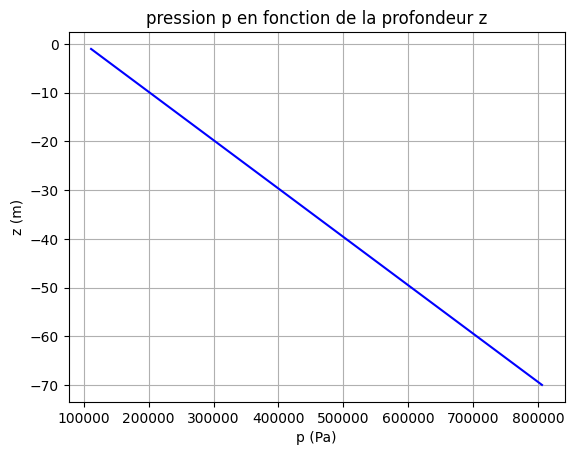

In [9]:
# question 4. Figure

plt.plot(p_vec,z_vec,'b')
plt.xlabel('p (Pa)')
plt.ylabel('z (m)')
plt.title('pression p en fonction de la profondeur z')
plt.grid(True)

## 2. Evolution du volume des poumons avec la profondeur

On assimile l’air contenu dans les poumons du plongeur à un gaz parfait ; cet air est caractérisé par une pression $p(z)$ identique à celle de l’eau à l'altitude $z$ , un volume
$V(z)$ (capacité pulmonaire) variable (la cage thoracique se
déforme sous l’effet de la pression), et enfin par une température $T_i$ , constante et indépendante de la profondeur.

> 5. Formuler la capacité pulmonaire $V(z)$ du plongeur en fonction de $z$
sachant que celui-ci, avant de plonger, gonfle ses poumons
à leur capacité maximale $V_M$ puis bloque sa respiration. On expliquera la démarche. Donner la valeur pour $z=-10$ mètres. Tracer une figure.

On donne $V_M = 7 \cdot 10^{-3} m^3$ .

*question 5. Formulation >>> A COMPLETER*
    

In [11]:
# question 20. Calcul du volume des poumons
#P1.V1=P2.V2
#P(0)*P(0)=P(z)*V(z)
#V(z)=(P(0)*V(0))/P(z)
#V(-10)=(P(0)*V(0))/P(-10)
z=np.arange(-70,0,1)
p_z=p_atm-(rho_eau*g*z) #m
Vm=7*10**-3 #m**3
V_z=(Vm*p_atm)/p_z

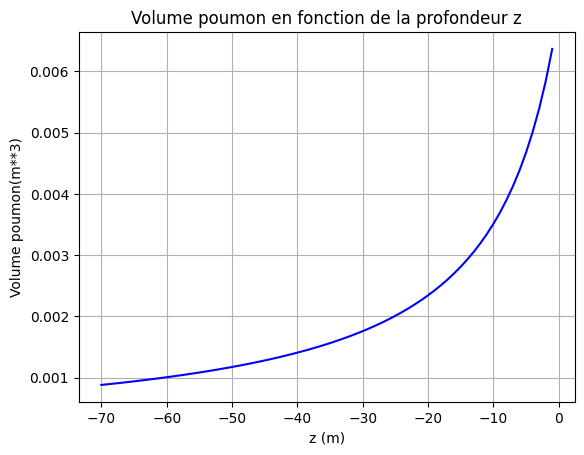

In [12]:
# question 5. Figure
plt.plot(z,V_z,'b')
plt.xlabel('z (m)')
plt.ylabel('Volume poumon(m**3)')
plt.title('Volume poumon en fonction de la profondeur z')
plt.grid(True)

## 3. Poids apparent du plongeur

On définit le poids apparent $P_{app}(z)$ du plongeur 
comme la résultante du poids et de la poussée d’Archimède.  
On s'intéresse à sa valeur algébrique suivant $z$, soit $P_{app}(z)$.
On notera cette variable $\mathtt{poids\_app}$ dans le code.

> 6. Comment varie le poids apparent *poids_app* lorsque la
profondeur augmente ? Diminue-t-elle ou augmente-
t-elle ? Tracer les figures montrant l'évolution de chacun des termes de l'équation, et permettant de justifier ce résultat.
> 6. Que vaut le poids apparent i) à la surface (le corps du plongeur est considéré entièrement immergé), ii) à 10 et iii) à 70 mètres de profondeur ? On pourra aussi exprimer le résultat en termes de 'masse apparente'.
> 7. Expliquer physiquement les conséquences d'un signe positif ou négatif du poids apparent.

Remarque : Le corps, hors cage thoracique, est incompressible, c'est-à-dire que son volume ne change pas. 
On appelle $m$ la masse du plongeur, $V^*(z)$ le
volume de son corps et $V_0$ le volume de son corps hors
celui de la cage thoracique, de sorte que $V^*(z) =
V_0 + V(z)$ .

On donne $V_0 = 0,077 m^3$ et $m = 80 kg$ .

*question 6. Formulation >>> A COMPLETER*


In [13]:
#question 6. Calcul du poids apparent.
m= 80
p_archimède=rho_eau*(0.077+V_z)*9.81
P_app=(m*(g))-p_archimède
#Lorsque la profondeur augmente, le poids apparent diminue. Le minimum atteint est atteint à -10.

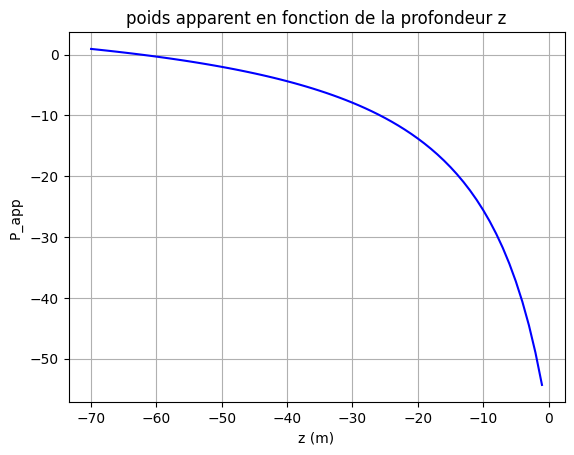

In [14]:
#question 6. Figure.
plt.plot(z,P_app,'b')
plt.xlabel('z (m)')
plt.ylabel('P_app ')
plt.title('poids apparent en fonction de la profondeur z')
plt.grid(True)

*question 6. Commentaire >>> A COMPLETER*
    

In [131]:
# question 7. Calcul de la masse apparente
#A la surface le poids apparent vaut à peu près -1800 Pa, à moins dix mètres: -12 500. Enfin à moins de 70 mètres: -18000 Pa.
# question 8.
#puisque le poids apparent est negatif, la poussée d'achidème est plus importante que le poids, donc l'objet est censé remonter(s'il ne fournit pas d'effort pour descendre).
#Inversement avec le poids apparent positif.

*question 7. Commentaire >>> A COMPLETER*


*question 8. Commentaire >>> A COMPLETER*


## 4. Plan neutre et calcul du lest

Afin de faciliter leur descente lors des premiers
mètres, les plongeurs utilisent souvent un lest, plaque de
plomb de volume négligeable, accrochée à une ceinture et
facilement larguable. Ce lest ne doit pas être trop lourd car
un surlestage peut inciter à descendre à une profondeur
excessive.  

On appelle la **profondeur d'équilibre** ou **plan neutre**, la profondeur à laquelle le plongeur peut descendre sans faire d effort.

> 9. Donner la condition d'équilibre du plan neutre, de manière formelle.
> 8. A quelle profondeur correspond le plan neutre ? 
    >>   Astuce: on utilisera la fonction $\verb|interp1d|$ de la bibliothèque $\verb|scipy|$. 
> 9. Quelle masse $m_1$ de lest choisir si l’on adopte comme règle de sécurité le fait que le plongeur doit être à l'équilibre à la profondeur de 5 mètres ? Vérifier le résultat obtenu en recalculant la profondeur du plan neutre avec un plongeur alourdi de $m_1$ kg. Faire une figure.



*question 9. Formulation >>> A COMPLETER*


In [132]:
#question 9
#Il faut que la poussée d'achimède soit inférieur ou egal au poids.

# question 10. Calcul du plan neutre.
#Par lecture graphique, on voit un pic qui correspsond à -10
invf=interp1d(P_app, z_vec)
Papp=0
profondeur_neutre= invf(Papp)



171755.41999999998
0.022989884580469456
22.58962157956165
151625.3
0.013911013457841251
13.274699807745122


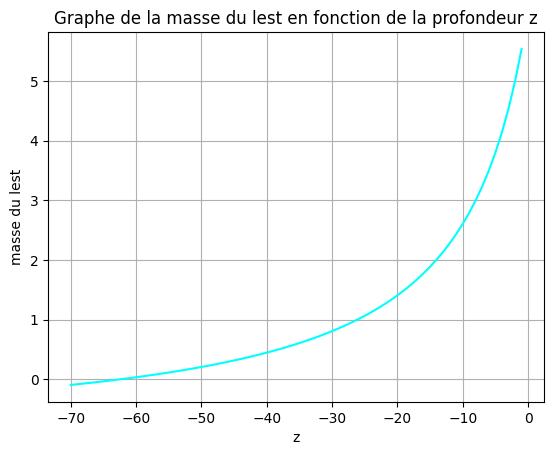

In [16]:
# question 11. Figure.
V_zero=0.077
m_lest=rho_eau*(V_zero+V_z)-80
plt.plot(z_vec,m_lest, 'aqua')
plt.xlabel('z')
plt.ylabel('masse du lest')
plt.title('Graphe de la masse du lest en fonction de la profondeur z')
plt.grid(True)
 
p_vec=p_atm-(rho_eau*(g*(-7)))
print(p_vec)
v_max:float=0.007
p_moins7=30844
v_moins7=(p_atm*v_max)/p_moins7
print(v_moins7)
print(rho_eau*(V_zero+v_moins7)-80)
#La masse m1 est de 22 grammes pour une profondeur de 7 mètres
p_vec=p_atm-(rho_eau*(g*(-5)))
print(p_vec)
v_max:float=0.007
p_moins5=50974
v_moins5=(p_atm*v_max)/p_moins5
print(v_moins5)
print(rho_eau*(V_zero+v_moins5)-80)
#La masse m1 est de 13 grammes pour une profondeur de 5 mètres

# Deuxième partie: Stratification de l'eau de mer

La masse volumique de l'eau de mer dépend de la température, de la pression et de la salinité de l'eau.
La salinité est exprimée en *psu*, l' "unité de salinité pratique", qui exprime la masse de sels divers (chlorure de sodium essentiellement) en gramme par kg d'eau.

On peut définir trois couches d'eau décrivant la structure verticale des océans : la thermocline, la halocline et la pycnocline (voir figure 1.)

![alt text](images/thermocline.jpeg "thermocline")<br> Figure 1: profils typique de température, salinité et densité de l'eau des océans.

La couche d'eau à la surface de l’océan est en contact avec l’atmosphère et est mélangée par l’action du vent. La diminution rapide de la densité en dessous (appelée couche *pycnocline*, de faible épaisseur) est associée à la *thermocline* (variation rapide de la température) ou à la *halocline* (variation rapide de la salinité). L’océan profond occupe la plus grande partie de l’océan mondial et n'est en contact direct avec l’atmosphère qu’en des régions très localisées aux hautes latitudes (pôles). 

On considère que la
surface libre de l’eau (cote $z = 0$) est en contact avec l’atmosphère, de pression constante $P_{atm} = 1,013 \cdot 10^5 Pa$ .

L'**objectif de cette première partie** de projet est d'estimer la distribution de la densité avec la profondeur, et de caractériser la couche de surface.<br>
Dans un second temps, suivant l'avancée du projet, on pourra identifier les trois couches d'eau et proposer un modèle simplifié.

## 1. Lecture des données

On possède les mesures de température et de salinité de capteurs (appelés des profileurs) ancrés sur le talus continental externe au sud de la Nouvelle-Angleterre (EU) durant le mois de Décembre 2011.

Ces mesures  sont sauvegardées respectivement dans les fichiers '<coordonnees_T-??dec_axes_phys.npy>' ('<coordonnees_S-??dec_axes_phys.npy>') pour la température (et la salinité) en unités internationales, par exemple pour le 21 décembre 2011.

Référence: Gawarkiewicz, G.G., Todd, R.E., Plueddemann, A.J., Andres, M. &
Manning, J.P. Direct interaction between the Gulf Stream and the shelfbreak south of New
England. Sci. Rep. 2, 553; DOI:10.1038/srep00553 (2012).

Les données sauvegardées dans les fichiers respectent l'ordre suivant : 
* la première colonne contient les données de température (ou salinité) stockées dans un vecteur **t_vec** ;
* la seconde colonne contient les données d'altitude, stockées dans un vecteur **z_vec**.
    
> 13. tracer une figure contenant deux diagrammes placés côte-à-côte (un pour la température, un pour la salinité), visualisant les mesures en fonction de l'altitude $z$. On notera le signe de $z$.

In [17]:
# question 13.
# lecture des données

# --- A COMPLETER et DECOMMENTER ---
coord=np.loadtxt('coordonnees_T-21dec_axes_phys.txt') ### >>> modifier le nom du fichier
t_vec_T = coord[:,0] # On extrait la température en degrés Celsius dans  la première colonne de coord
z_vec_T = coord[:,1] # On extrait la profondeur dans la deuxième colonne de coord

# a completer pour la salinité
coord=np.loadtxt('coordonnees_S-21dec_axes_phys.txt') ### >>> modifier le nom du fichier
t_vec_S = coord[:,0] # On extrait la température en degrés Celsius dans  la première colonne de coord
z_vec_S = coord[:,1] # On extrait la profondeur dans la deuxième colonne de coord


# a completer pour la salinité
print(z_vec_S)

[-445.9588   -430.6358   -415.3127   -402.1787   -387.5853   -379.559
 -360.5876   -345.2646   -326.2932   -314.6185   -302.9438   -285.4318
 -271.5681   -259.8934   -248.2187   -235.8143   -222.6803   -212.465
 -200.0606   -192.0342   -182.5486   -173.0629   -163.5772   -157.7398
 -147.5245   -138.0388   -130.0124   -121.2564   -112.5004   -105.9334
  -98.6367    -92.79935   -87.69167   -86.96201   -83.31367   -80.39499
  -81.12466   -81.85433   -75.28731   -71.63897   -59.96428   -50.47859
  -43.18191   -32.23688   -24.21053   -14.72485    -5.239158   -1.590816]


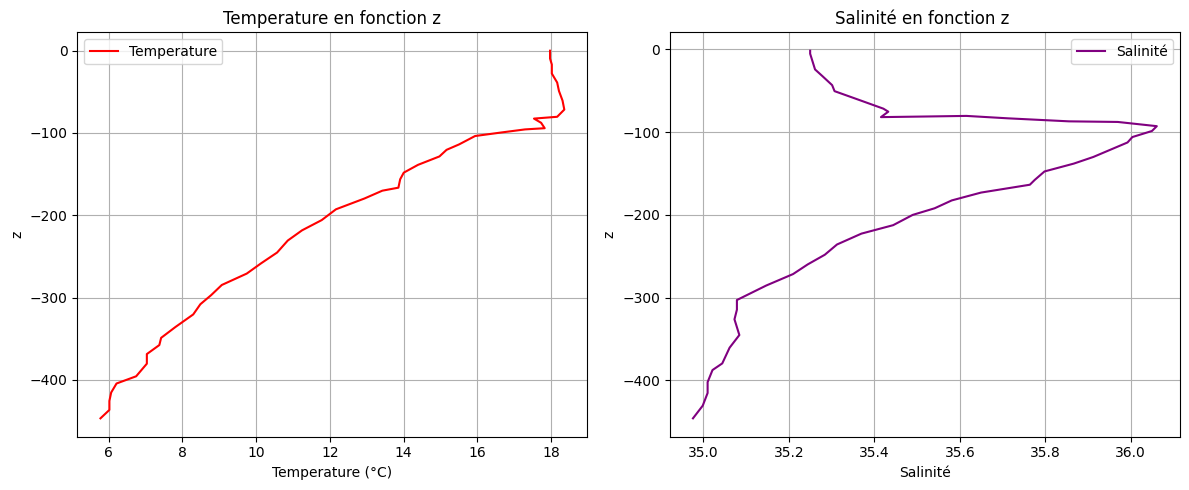

In [21]:
# tracer la figure des données
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot for temperature
ax1.plot(t_vec_T, z_vec_T, label='Temperature', color='red')
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('z')
ax1.set_title('Temperature en fonction z')
ax1.grid(True)
ax1.legend()

# Plot for salinity
ax2.plot(t_vec_S, z_vec_S, label='Salinité', color='purple')
ax2.set_xlabel('Salinité')
ax2.set_ylabel('z')
ax2.set_title('Salinité en fonction z ')
ax2.grid(True)
ax2.legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

## 2. Fonctions d'interpolation des données

> 14. Calculer les deux fonctions d'interpolation (**interp_T** et **interp_S**) interpolant respectivement les mesures de température et de salinité.
> 2. Tracer deux figures placées côte-à-côte (l'une pour T, et l'autre pour S) superposant les mesures et les fonctions interpolées sur un intervalle de **z** compris entre -400 m et la surface, avec un pas de 100 mètres, puis 50 et 10. Que pensez-vous de l'importance du pas ?

// Astuce // on utilisera la fonction **interp1d** de la bibliothèque *scipy*, qui renvoie la fonction d'interpolation relative aux arguments. Pour plus de détails sur **interp1d**, taper $\verb+?interp1d+$ dans une cellule. Ci-dessous, un exemple de syntaxe : 

    from scipy.interpolate import interp1d 
    interp_T = interp1d(z_vec_T, t_vec_T)

**interp_T** est une *fonction* ayant pour argument un vecteur profondeur quelconque (**z\_vec**) mais  contenu à l'intérieur des bornes de l'intervalle d'origine **z_vec_T**, soit par exemple : 
    
    T=interp_T(z_vec)


In [26]:
# aide sur la fonction
?interp1d                # >>> A décommenter si besoin

Object `interp1d                # >>> A décommenter si besoin` not found.


In [27]:
# question 14.
z_values = np.arange(-400, 1, 100)
# creation de la fonction d'interpolation avec interp1d
interp_T = interp1d(z_vec_T, t_vec_T, kind='linear', fill_value='extrapolate')

interp_S = interp1d(z_vec_S, t_vec_S, kind='linear', fill_value='extrapolate')
# appel de la fonction 
T=interp_T(z_values)
print(T)
S=interp_S(z_values)
print(S)


[ 6.48050308  8.70206242 11.95161565 16.55837863 17.96943   ]
[35.01167642 35.09003002 35.49009807 36.04087338 35.24984   ]


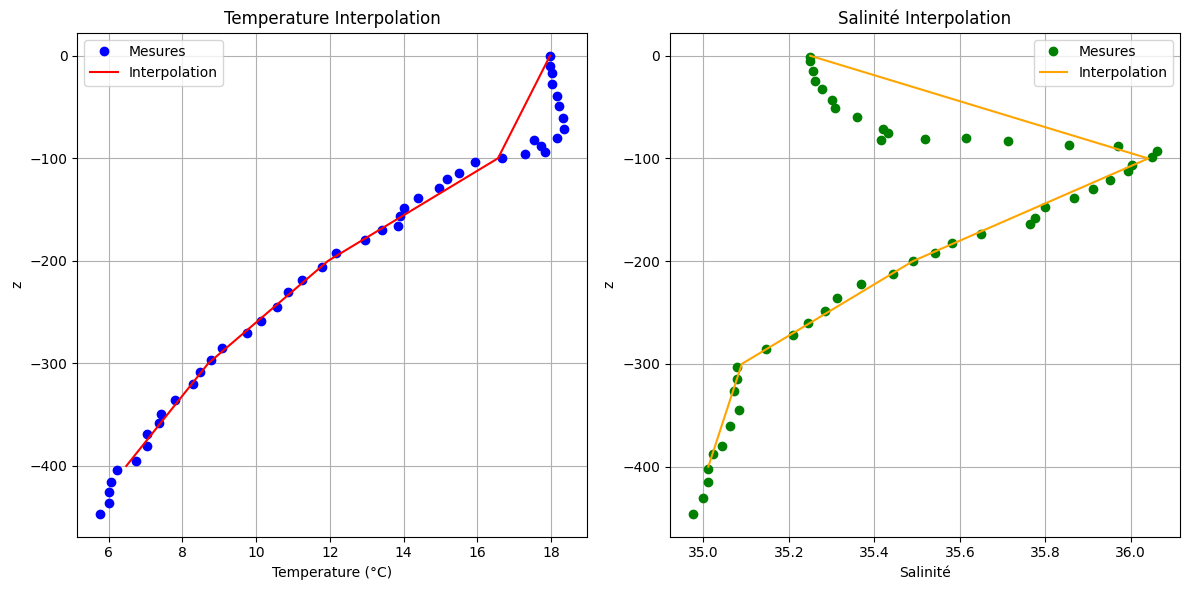

In [28]:
# question 15.
# tracé des figures

#puis z_values = np.arange(-400, 1, 50)
#puis z_values = np.arange(-400, 1, 10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot( t_vec_T,z_vec_T, 'o', label='Mesures', color='blue')
ax1.plot(T,z_values, label='Interpolation', color='red')
ax1.set_title('Temperature Interpolation')
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('z')
ax1.grid(True)
ax1.legend()

ax2.plot( t_vec_S, z_vec_S, 'o', label='Mesures', color='green')
ax2.plot(S,z_values, label='Interpolation', color='orange')
ax2.set_title('Salinité Interpolation')
ax2.set_xlabel('Salinité')
ax2.set_ylabel('z')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

#plus le pas est petit plus les points accompagnent la courbe. Pour de plus de précision, il faut donc avoir un pas le plus faible possible.


## 3. Loi d'état approximative pour l'eau salée

Une forme approchée de la loi d'état de l'eau salée s'écrit sous la forme suivante
\begin{equation}
\rho(T,S,P_z) = C(P_z) + \beta(P_z) \, S - \alpha(T, P_z)\, T - \gamma(T, P_z)\, (35 - S) \, T
\end{equation}
avec $\rho$ en $kg/m^3$, $P_z$ est la profondeur en $km$, $S$ en *psu* (ou $^\circ / {\circ\circ}$), T in $^\circ C$. 

__ATTENTION :__ ici $P_z=-z$, et est exprimée en kilomètres.

Les coefficients C, $\beta$, $\alpha$ et $\gamma$ sont des fonctions de la profondeur et de la température.

\begin{eqnarray}
C(P_z) &=& 999.83 + 5.053 P_z - 0.048 P_z^2 \\
\beta(P_z) &=& 0.808 - 0.0085 \, P_z \\
\alpha(P_z, T) &=& 0.0708 \, * \left(1+0.351\, P_z + 0.068 \,T \,* (1-0.0683 \, P_z) \right) \\
\gamma(P_z,T) &=& 0.003 \, * \left(1-0.059 \, P_z - 0.012 \, T \, *(1-0.064 \, P_z) \right)
\end{eqnarray}

> 16. Ecrire une fonction appelée $\verb+densite+$ qui renvoie la valeur de $\rho(T,S,P_z)$.
> 4. Calculer la masse volumique de l'eau à 400 mètres. Tracer la variation de la densité suivant la profondeur pour $(-445 \textrm{m}<z<-2\textrm{m}$, avec un pas de 1 mètre). Sur une même figure, on tracera trois images côte-à-côte, à l'identique de la figure 1. 

Remarque: on ne peut pas utiliser informatiquement une fonction interpolée en dehors de la plage de variation des données interpolées (mais on augmente largement les erreurs commises !  C'est une hypothèse forte.). En conséquence, on pourra adapter la plage de variation de $z$ en fonction des données contenues dans les fichiers de départ.


In [29]:
# question 16.
def densite(T,S,p):
    """
    Calcule la densité en fonction de la Température, de la salinité et de p
    """
    Cp=999.83+5.053*p-0.048*p**2
    Bp=0.808- 0.0085*p
    ap_t=0.0708*(1+0.351*p+0.068*T*(1- 0.0683*p))
    lp_t=0.003*(1-0.059*p-0.012*T*(1-0.064*p))
    rho = Cp+Bp*S-ap_t*T-lp_t*(35-S)*T
    
    return rho


In [30]:
# question 17. calcul de la densité à z = 400
T400=t_vec_T[4]
S400=t_vec_S[3]
v=densite(T400,S400,-0.4)
print(v)


1025.6390899494813


<Figure size 1500x500 with 0 Axes>

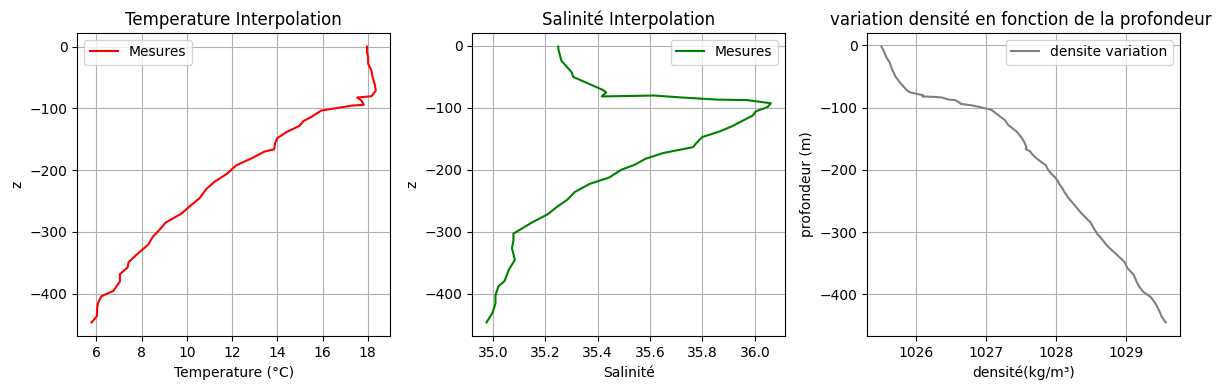

In [33]:
# question 17. figure
depth_values = np.arange(-445, -1, 1)
rho_values = densite(interp_T(depth_values),interp_S(depth_values),-depth_values/1000)
plt.figure(figsize=(15, 5))

fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(12, 4))

plt.plot(rho_values, depth_values, label='densite variation', color='gray')
plt.title('variation densité en fonction de la profondeur ')
plt.ylabel('profondeur (m)')
plt.xlabel('densité(kg/m^3)')
plt.grid(True)
plt.legend()

ax1.plot( t_vec_T,z_vec_T, '-', label='Mesures', color='red')

ax1.set_title('Temperature Interpolation')
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('z')
ax1.grid(True)
ax1.legend()

ax2.plot( t_vec_S, z_vec_S, '-', label='Mesures', color='green')
ax2.set_title('Salinité Interpolation')
ax2.set_xlabel('Salinité')
ax2.set_ylabel('z')
ax2.grid(True)
ax2.legend()

ax3.set_title('variation densité en fonction de la profondeur ')
ax3.set_xlabel('densité(kg/m³)')
ax3.set_ylabel('profondeur (m)')
ax3.grid(True)
ax3.legend()

plt.tight_layout()
plt.show()

## 4. Couche superficielle : analyse de la distribution de la densité
Les pratiquants de la plongée libre de loisirs évoluent plus couramment entre la surface et 40 mètres de profondeur. 
Prenant une marge de sécurité, nous étudions la nappe d'eau sur les 50 premiers mètres de profondeur

> 18. Tracer trois histogrammes placés côte-à-côte dans une même figure.
    >> * le premier contient toutes les valeurs de densité $\rho$ contenues dans les données initiales (sur toute la profondeur connue) ;
    >> * le deuxième contient seulement les valeurs pour les 50 premiers mètres ;
    >> * le troisième identifie parmi les mesures complètes les valeurs des 50 premiers mètres en rouge.    
> 6. Que dire des 50 premiers mètres ? Commenter la figure dans une cellule *markdown* du notebook.
> 6. Ecrire une fonction *analyse* qui renvoie la valeur moyenne, l'écart-type et l'erreur relative commise sur la moyenne pour les données complètes ;

>> Astuce : on utilisera des sections de tableaux comme argument de la fonction.

> 21. Utiliser cette fonction pour les 50 premiers mètres.
> 9. Que pensez-vous de l'hypothèse de considérer la densité constante sur les 50 premiers mètres ?

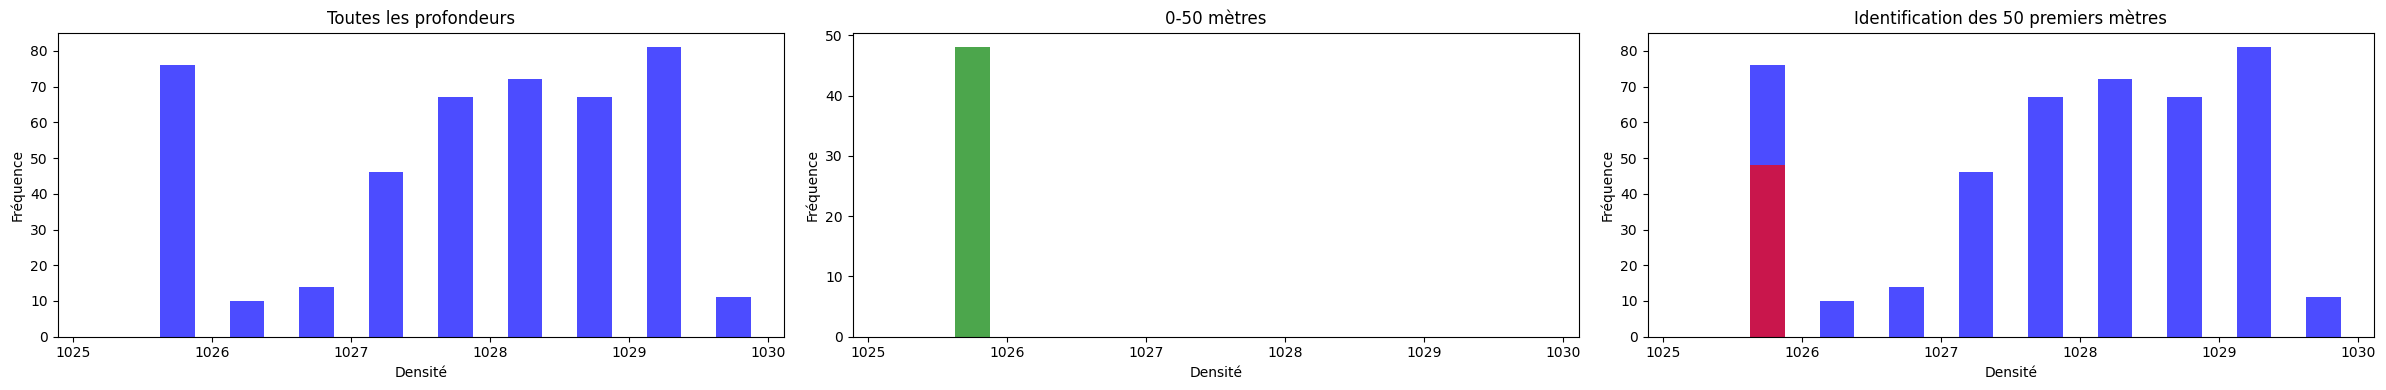

In [147]:
# question 18. histogrammes
plt.figure(2,figsize=(24,4))
plt.subplot(131)
plt.hist(rho_values,range=(1025,1030), bins=10, color='blue', alpha=0.7, rwidth=0.5)
plt.title('Toutes les profondeurs')
plt.xlabel('Densité')
plt.ylabel('Metre')


plt.subplot(132)
plt.hist(rho_values[depth_values>-50], range=(1025,1030), bins=10, color='green', alpha=0.7,rwidth=0.5)
plt.title('0-50 mètres')
plt.xlabel('Densité')
plt.ylabel('Metre')

plt.subplot(133)
plt.hist(rho_values, range=(1025,1030),bins=10, color='blue', alpha=0.7,rwidth=0.5)
plt.hist(rho_values[depth_values>-50],range=(1025,1030), bins=10, color='red', alpha=0.7,rwidth=0.5)
plt.title('Identification des 50 premiers mètres')
plt.xlabel('Densité')
plt.ylabel('Metre')

plt.tight_layout()
plt.show()


In [ ]:
#question 19
#dans les primiers 50 metres 


*question 10. Commentaire >>> A COMPLETER*



In [99]:
# question 20. Calculer la masse volumique moyenne de l'eau salée sur toute la profondeur connue
def moyenne_t():
    

In [68]:
# question 21. Calculer la masse volumique moyenne de l'eau salée sur les 50 premiers metres
def moyenne_50()

*question 22. Commentaire >>> A COMPLETER*


---
# ... Pour aller plus loin ...
## 5. Couche profonde

---

Les sous-marins d'exploration peuvent descendre jusqu'à 4000 à 6000 mètres de profondeur pour explorer les fosses océaniques.

On s'intéresse donc maintenant à la distribution de densité au-delà des 50 premiers mètres.

 > 1. proposer un modèle en 3 morceaux de p(z) avec des polynômes de degré 1, sous la forme d'une fonction. Tracer une figure.
     >>   Astuce : on utilisera les fonctions numpy $\verb|polyfit|$ et $\verb|poly1d|$.
 > 11. calculer la position de la pycnocline ;
     >> Dans notre cas, on peut considérer que le changement de pente de $\rho(z)$ marque la pycnocline.     
 > 11. dans la couche profonde, est-ce que $\rho$ constante est une hypothèse valide? jusqu'à quelle profondeur ?
     >> on répondra à la question tout d'abord pour les 400 premiers mètres, 
 > 11. écrire une fonction 'rho_pieces' à partir des 3 morceaux (couche superficielle / pycnocline / couche profonde) de $\rho(z)$ qui renvoie la densité de l'eau de mer pour tout $z$. Tracer une figure.
     >> Astuce : 2 possibilités : soit on crée une fonction $\verb|rho_pieces|$ qui renvoie la densité à une profondeur particulière $z$, soit on joue sur des opérateurs logiques pour renseigner des sections de tableau du vecteur  $\verb|densite|$ relatives à chacune des trois couches d'eau.
 > 11. calculer l'erreur commise entre cette fonction et les valeurs interpolées des mesures. La représenter sous la forme d'un histogramme.
 > 11. extrapoler la méthode jusqu'à 6 000 mètres. Que vaut la masse volumique de l'eau à 6000 mètres ?
 
 N'oubliez pas de tracer et commenter vos figures et résultats au fur et à mesure de leur production.
 

In [108]:
# question 1. Modele en 3 morceaux 


In [109]:
# question 2. Figure.
#La pycnocline peut être approximativement identifiée au point où il y a un changement de pente dans la courbe de densité.
#Vous pouvez le déterminer visuellement à partir du graphique.

In [110]:
# question 3. Position de la pycnocline


In [111]:
# question 4. Densité et couche profonde

*question 4. Commentaire >>> A COMPLETER*


In [112]:
# question 5. Modèle de masse volumique en 3 morceaux
# Calcul de l'erreur entre la fonction rho_pieces et les mesures


In [113]:
# question 5. Figure.

In [114]:
# question 6. calcul de l'erreur relative du modèle 
# Extrapolation jusqu'à 6000 mètres


In [115]:
# question 6. histogrammes


In [116]:
# question 7. extrapolation à 6000 mètres


In [117]:
# question 7. Figure.

---
# Troisième partie (... pour aller plus loin ...)
# Calcul du volume des ballasts pour une plongée statique de sous-marins
---

Dans cette partie, on s'intéresse à deux sous-marins existants particuliers (civil puis militaire), dont on connait les caractéristiques.
Vous trouverez des exemples sur les sites web suivants, qui sont repris plus bas. D'autres choix sont possibles.

1. sous marin civil
 * <https://fr.wikipedia.org/wiki/Nautile_(sous-marin_de_poche)>
 * <https://fr.wikipedia.org/wiki/Cyana>
2. sous-marin militaire
 * <https://fr.wikipedia.org/wiki/Ouessant_(S623)>
 * <https://fr.wikipedia.org/wiki/Le_Terrible_(S619)>
 

> 7. Pour le sous-marin *civil* considéré, calculer le volume d'eau à embarquer dans les ballasts pour faire plonger le sous-marin à sa *profondeur d'équilibre* (ou *profondeur d'intervention*). Formuler les hypothèses nécessaires au calcul.
> 11. Pour le sous-marin *militaire* considéré, calculer le volume d'eau à embarquer dans les ballasts. Au préalable calculer la profondeur d'intervention. Vérifier qu'elle est cohérente avec l'ordre de grandeur annoncé. Formuler les hypothèses additionnelles : vous aurez sans doute besoin d'ajuster le volume du sous-marin. Expliquer.
> 11. Vérifier la cohérence de votre résultat avec la taille du sous-marin, et celle de la zone habitée (voir les données sur les pages web). On pourra utiliser un test logique pour exprimer la validité ou non  du modèle. Tester un sous-marin civil et un sous-marin militaire.

**Astuce** : on pourra sauvegarder (et relire ensuite les valeurs) l'évolution de la masse volumique de l'eau avec la profondeur, calculée dans la première partie du projet, dans un fichier texte, de la façon suivante :

sauvegarde dans un fichier : 
    
    table=np.column_stack((z_vec, rho_vec))                       
    np.savetxt('densite.txt', table, fmt='%.1f %.3f', delimiter="  ")
    
lecture du fichier :

    table=np.loadtxt('densite.txt')
    z_vec=table[:,0]
    rp=table[:,1]


*question 7. Hypothèses de calcul pour le sous-marin civil.* >>> A COMPLETER


In [121]:
# question 7. Calcul du volume de ballast.
# Hypothèses
profondeur_intervention_nautile = 6000  
densite_eau_mer = 1030  

g = 9.81
poussee_archimede_nautile = densite_eau_mer * g * profondeur_intervention_nautile
volume_eau_nautile = poussee_archimede_nautile / densite_eau_mer

print(f"Le volume d'eau à embarquer dans les ballasts du sous-marin Nautile est d'environ {volume_eau_nautile:.2f} m^3.")


Le volume d'eau à embarquer dans les ballasts du sous-marin Nautile est d'environ 58860.00 m^3.


*question 8. Hypothèses de calcul pour le sous-marin militaire.* >>> A COMPLETER


In [47]:
# question 8. Calcul du volume de ballast.
poids_sous_marin_ouessant = 1900 * g  
volume_sous_marin_ouessant = 4000  
profondeur_intervention_ouessant = poids_sous_marin_ouessant / (densite_eau_mer * g)

if profondeur_intervention_ouessant > 300: 
    volume_sous_marin_ouessant *= 1.5  

poussee_archimede_ouessant = densite_eau_mer * g * profondeur_intervention_ouessant
volume_eau_ouessant = poussee_archimede_ouessant / densite_eau_mer

print(f"La profondeur d'intervention du sous-marin Ouessant est d'environ {profondeur_intervention_ouessant:.2f} m.")
print(f"Le volume d'eau à embarquer dans les ballasts du sous-marin Ouessant est d'environ {volume_eau_ouessant:.2f} m^3.")


La profondeur d'intervention du sous-marin Ouessant est d'environ 1.84 m.
Le volume d'eau à embarquer dans les ballasts du sous-marin Ouessant est d'environ 18.10 m^3.


*question 8. Commentaire.* >>> A COMPLETER


In [41]:
# question 9. Vérification du résultat
#Pour vérifier la cohérence des résultats avec la taille du sous-marin, 
#vous pouvez comparer le volume calculé avec le volume réel du sous-marin. 
#Si le volume calculé est significativement différent du volume réel, 
#cela peut indiquer des erreurs dans les hypothèses ou les calculs.

*question 9. Commentaire.* >>> A COMPLETER
